# Llamaradas solares

En este Notebook desarollamos toda la práctica desde el entendimiento de los datos hasta el despliegue. Para conocer el entendimiento del negocio, ver README.md 

In [1]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Primero haremos un entendimiento de los datos.

## Entendimiento de los datos

In [2]:
column_names = ["Flare", "Date", "Start time", "Peak time", "End time", "Duration", "Peak counts", 
                "Total counts", "Energy", "X pos", "Y pos", "Radial", "Active region", 
                "Flag 1", "Flag 2", "Flag 3", "Flag 4", "Flag 5"]

df = pd.read_csv("hessi.solar.flare.UP_To_2018.csv",names=column_names, header = 0)

# Deal with datetime format
df['Start time'] = pd.to_datetime(df['Date'] + ' ' + df['Start time'])
df['Peak time'] = pd.to_datetime(df['Date'] + ' ' + df['Peak time'])
df['End time'] = pd.to_datetime(df['Date'] + ' ' + df['End time'])
df['Date'] = pd.to_datetime(df['Date'])
df.loc[df['Start time'] >= df['End time'], 'End time'] += pd.Timedelta(days=1)
df.loc[df['Start time'] >= df['Peak time'], 'Peak time'] += pd.Timedelta(days=1)
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [3]:
df.tail()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
116138,18020903,2018-02-09,2018-02-09 16:41:28,2018-02-09 16:42:54,2018-02-09 16:43:32,124,18,2888.00,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
116139,18020904,2018-02-09,2018-02-09 18:15:56,2018-02-09 18:17:26,2018-02-09 18:17:40,104,16,1656.00,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
116140,18021001,2018-02-10,2018-02-10 13:04:36,2018-02-10 13:06:46,2018-02-10 13:07:04,148,15,2224.00,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2
116141,18022601,2018-02-26,2018-02-26 15:49:56,2018-02-26 15:51:18,2018-02-26 15:53:52,236,16,3312.00,6-12,115,192,223,2700,A0,DF,P1,PE,Q2
116142,18030301,2018-03-03,2018-03-03 04:04:08,2018-03-03 04:06:22,2018-03-03 04:12:20,492,42,15816.00,6-12,926,128,935,2700,A0,P1,PE,Q1,NaN


Tenemos disponibles datos de cada llamarada solar que se ha registrado en la misión. Cada una tiene un ID, unos datos de duración, unos datos de intensidad y unos datos de posición. Además, vemos que en las columnas de `Flag n` hay muchos datos faltantes. Es como si a cada registro se le asignaran algunas `Flags` y se guardan ahí como una lista sin un orden específico.

Vemos que se registra para cada llamarada solar no solo la hora de inicio y fin, si no la hora de mayor intensidad.

In [4]:
df.isnull().sum()

Flare                0
Date                 0
Start time           0
Peak time            0
End time             0
Duration             0
Peak counts          0
Total counts         0
Energy               0
X pos                0
Y pos                0
Radial               0
Active region        0
Flag 1               0
Flag 2               0
Flag 3           19907
Flag 4           20202
Flag 5           61180
dtype: int64

Notamos que los únicos valores faltantes están en las columnas `Flag 3`, `Flag 4` y `Flag 5`. Así que a cada regsitro se le asigna de dos a cinco `Flags`

In [5]:
df.describe(include = "all")

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5
count,116143.00,116143,116143,116143,116143,116143.00,116143.00,116143.00,116143,116143.00,116143.00,116143.00,116143.00,116143,116143,96236,95941,54963
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,5,16,17,19,172
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,NaN,NaN,NaN,NaN,A0,P1,P1,Q1,Q2
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86959,NaN,NaN,NaN,NaN,107773,39341,45739,40533,34063
mean,10995631.19,2009-08-29 13:00:00.154981376,2009-08-30 00:49:29.076362752,2009-08-30 00:52:24.391431424,2009-08-30 00:57:42.719371776,493.64,215.09,376884.26,NaN,-7.68,-42.19,687.90,990.07,NaN,NaN,NaN,NaN,NaN
min,2021213.00,2002-02-12 00:00:00,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,8.00,0.00,8.00,NaN,-10012.00,-10005.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
25%,4112632.50,2004-05-27 00:00:00,2004-05-27 06:31:52,2004-05-27 06:34:34,2004-05-27 06:38:40,212.00,28.00,22840.00,NaN,-701.00,-247.00,467.00,0.00,NaN,NaN,NaN,NaN,NaN
50%,11122972.00,2011-08-08 00:00:00,2011-08-08 18:26:40,2011-08-08 18:27:34,2011-08-08 19:07:12,364.00,56.00,58560.00,NaN,0.00,-71.00,759.00,691.00,NaN,NaN,NaN,NaN,NaN
75%,14042224.50,2013-11-17 00:00:00,2013-11-17 17:34:46,2013-11-17 17:37:52,2013-11-17 17:45:58,628.00,144.00,179808.00,NaN,708.00,198.00,946.00,1564.00,NaN,NaN,NaN,NaN,NaN
max,171115109.00,2018-03-03 00:00:00,2018-03-03 04:04:08,2018-03-03 04:06:22,2018-03-03 04:12:20,4444.00,113156.00,435550080.00,NaN,1190.00,1223.00,14154.00,9999.00,NaN,NaN,NaN,NaN,NaN


Nótese que:
- Flare es un número de identificación único, por lo que no lo analizaremos. 
- Vemos que los datos comienzan a registrarse desde el año 2002 y terminan en el año 2018. Esto va de la mano con lo especificado por la duración de la misión RHESSI. 
 - La duración de una llamarada solar dura entre 8 segundos a 4444 segundos. Un rango muy grande. 
 - Hay peak counts de 0, extraño para un dispositivo que utiliza estos peakcounts para detectar llamaradas solares. ¿Si no detectó ninguna, como es una llamarada solar?
 - En `x pos` la mediana es cero, indicando que es probable que estén tomando el origen axial como el centro del sol. `Y pos` está un poco más lejana, unos 70 km del centro. Sin embargo esto no quita la posibilidad de que también se esté tomando un origen axial desde el centro de y, ya que una diferencia de 70 km es muy poca comparada con el rango en el que está. Tendremos que confirmar esta hipótesis más adelante.
 - La energía es una variable categórica, con 9 opciones. La moda es 6-12 KeV.

Agregaremos una nueva columna, el tiempo que toma que otro pico de intensidad suceda dependiendo de la presente. Esta columna será la columna que trataremos de predecir. Dada una llamarada solar, ¿En cuanto tiempo sucederá el siguiente pico?

In [6]:
df.sort_values(by='Start time', inplace=True)
df['Time till next peak'] = (df['Peak time'].shift(-1) - df['Peak time']).dt.total_seconds()
df = df.iloc[:-1]
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,Y pos,Radial,Active region,Flag 1,Flag 2,Flag 3,Flag 4,Flag 5,Time till next peak
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN,688.00
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN,11388.00
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN,12536.00
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN,9684.00
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2,240.00


### Análisis de la columna objetivo: `Time Till Next`

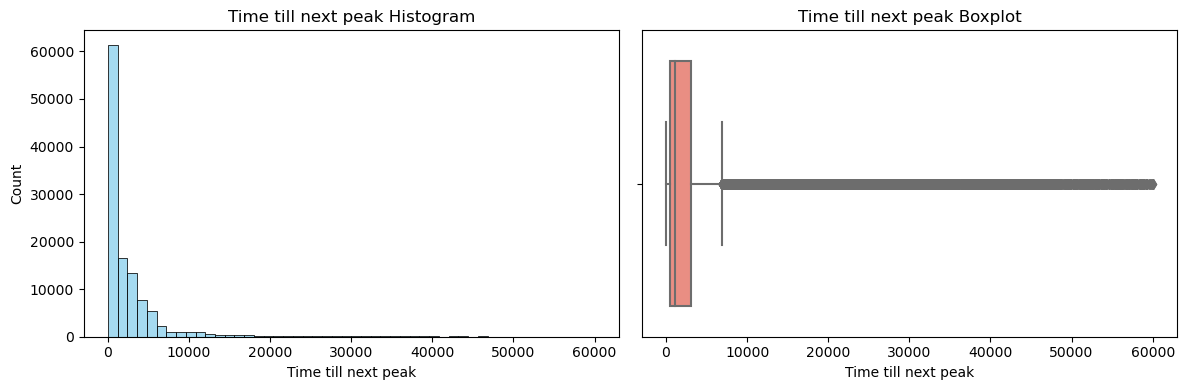

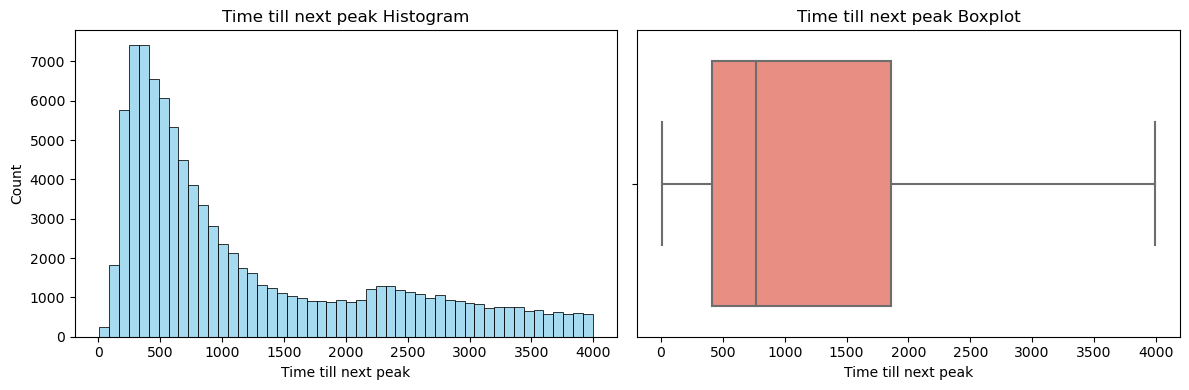

In [7]:
columns = ['Time till next peak']

# Function that we'll use to plot all numeric variables. It recives a dataframe, 
# the column to plot and a flag, indicationg if the column is the target column or not (True if its is not, False if it is).
def plot_numerical(df, columns, flag):
    num_cols = 2 + flag
    num_rows = len(columns)
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, num_rows * 4))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.histplot(data=df, x=col, ax=axes[i*num_cols], bins=50, color='skyblue')
        axes[i*num_cols].set_title(f'{col} Histogram')

        sns.boxplot(data=df, x=col, ax=axes[i*num_cols+1], color = "salmon")
        axes[i*num_cols+1].set_title(f'{col} Boxplot')
        
        if flag:
            sns.scatterplot(data=df, x='Time till next peak', y=col, ax = axes[i*num_cols + 2], color="skyblue", s  = 3)
            axes[i*num_cols+2].set_title(f'Time till nest peak vs. {col}')
            
    for j in range(num_rows * num_cols, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
plot_numerical(df[df["Time till next peak"] < 60000], columns, False)
plot_numerical(df[df["Time till next peak"] < 4000], columns, False)

Hemos graficado dos histogramas. El primero abarca un amplio rango de valores (menores de 60,000), mientras que el segundo se enfoca en valores más pequeños (menores a 4,000). Del análisis del primer histograma, observamos que la mayoría de los picos de las llamaradas solares ocurren poco tiempo después de otro pico. Esta distribución no es normal y está sesgada a la derecha. Es importante notar que hay muchos valores atípicos (outliers), los cuales pueden resultar problemáticos, por lo que más adelante aplicaremos algún tratamiento para manejar estos outliers.

El segundo histograma nos permite observar con mayor detalle la distribución de los valores más pequeños. Al igual que en el primer caso, la distribución no es normal. La distancia promedio entre picos en estos datos es de aproximadamente 700 segundos.

### Análisis de datos tipo fecha

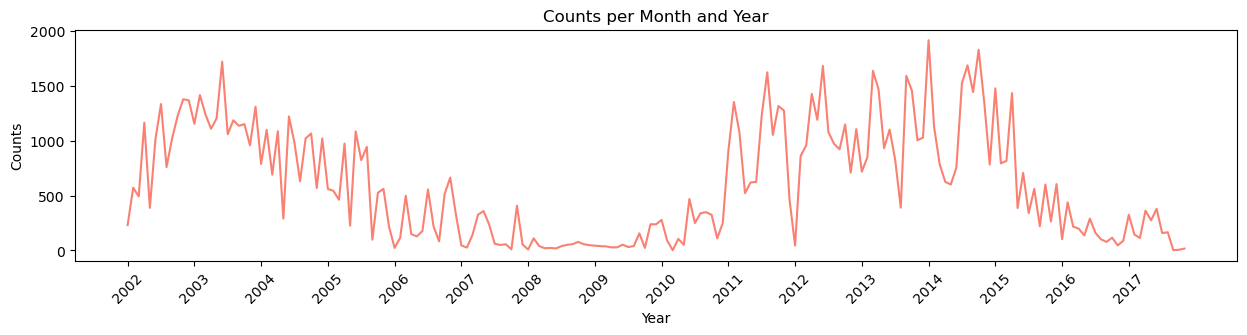

In [8]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
counts_per_month_year = df.groupby(['Year', 'Month']).size()

plt.figure(figsize=(15, 3))
ax = counts_per_month_year.plot(color='salmon')  # Change the color to salmon
plt.title('Counts per Month and Year')
plt.xlabel('Year')
plt.ylabel('Counts')

# Modify x-axis ticks and labels
ticks = range(0, len(counts_per_month_year), 12)  # Adjust the step as needed
labels = [f"{year}" for year, month in counts_per_month_year.index]
ax.set_xticks(ticks)
ax.set_xticklabels([labels[i] for i in ticks], rotation=45)

plt.show()

En esta gráfica que muestra las llamaradas solares por mes, podemos observar el ciclo solar. Según datos externos, sabemos que el ciclo solar tiene una duración aproximada de 11 años. En la gráfica se puede notar que la cantidad de erupciones solares sigue este ciclo, oscilando a lo largo de los años. Al analizar la duración de las llamaradas en cada uno de los años del ciclo solar, podemos identificar un patrón. Para este análisis, tomaremos el año 2008 como el inicio del ciclo solar.

In [9]:
# Calculate the solar cycle based on the year starting from 2008
df['Solar cycle'] = ((df['Date'].dt.year - 2008) % 11) + 1

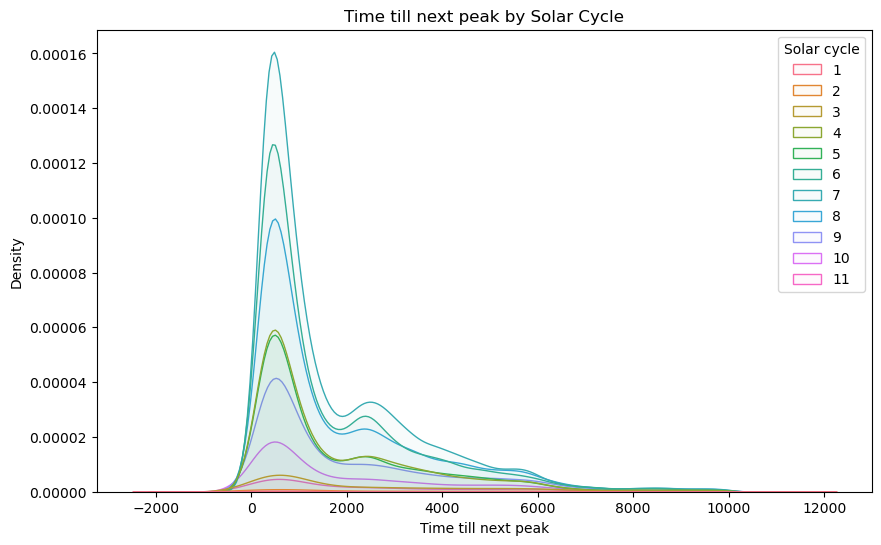

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains the necessary data
base_color = '#FF5733'
num_colors = 11
cyclic_palette = sns.color_palette("husl", num_colors)

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df["Time till next peak"] <= 10000], x='Time till next peak', hue='Solar cycle', fill=True, palette=cyclic_palette, alpha=0.04)
plt.title('Time till next peak by Solar Cycle')
plt.xlabel('Time till next peak')
plt.ylabel('Density')

plt.show()


Se han graficado para `Time till next peak` menor a 10000, ya que si no, no se ve una buena distribución. Vemos que en la mitad del ciclo (años 5-9) la cantidad de llamaradas solares es mucho mayor que a los extremos del ciclo. También es aparente que la varianza de estas llamaradas es menor en la mitad del ciclo, ya que tiene distribiciones más centralizadas que a los extremos, aunque tengan un promedio similar. Sin embargo nótese que en los años de la mitad del ciclo, hay dos modas o incluso 3, la de la izquierda dominante. Vemos que la duración promedio de las llamaradas se mantiene más o menos igual.

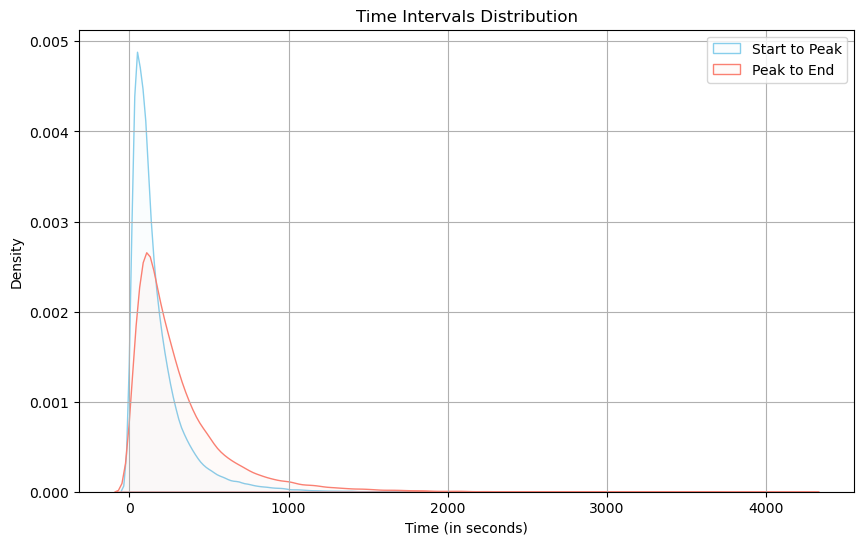

In [11]:
# Calculate difefrence between start - peak - end times
start_peak = (df["Peak time"] - df["Start time"]).dt.total_seconds()
peak_end = (df["End time"] - df["Peak time"]).dt.total_seconds()

plt.figure(figsize=(10, 6))
sns.kdeplot(start_peak, label='Start to Peak', color='skyblue', fill =True, alpha = 0.04)
sns.kdeplot(peak_end, label='Peak to End', color='salmon', fill =True, alpha = 0.04)

plt.title('Time Intervals Distribution')
plt.xlabel('Time (in seconds)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

Podemos ver que el tiempo que una llamarada tarda en llegar a su pico es mayor que la que necesita para terminar. Esto se confirma con la idea de que una vez que una erupción libera una gran energía en su pico, se termina muy rápido, ya que no tiene energía para sostenerse.

### Análisis de datos categóricos

Ya que los datos en la categoría `Flags` son tratados como una lista, convertiremos cada posible `flag` para analizarla independientemente

In [12]:
split_values = df['Flag 5'].str.split(' ', expand=True).add_prefix('FlagN ')
df = pd.concat([df, split_values], axis = 1)
flags = df.filter(like = "Flag")
flags = flags.drop("Flag 5", axis = 1)
flag_dummies = pd.get_dummies(flags, prefix="Flag")
flags = flag_dummies.groupby(flag_dummies.columns.str[-2:], axis=1).sum().astype(bool)
flags["A"] = flags.apply(lambda x: "A0" if x["A0"] == 1 else ("A1" if x["A1"] == 1 else "A3"), axis=1)
flags["Q"] = flags.apply(lambda x: "Q1" if x["Q1"] == 1 else ("Q2" if x["Q2"] == 1 else ("Q3" if x["Q3"] == 1 else ("Q4" if x["Q4"] == 1 else ("Q5" if x["Q5"] == 1 else ("Q6" if x["Q6"] == 1 else "Q7"))))), axis=1)
flags.drop(columns=["A1", "A0", "A3","Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7"], inplace=True)
df = pd.concat([df, flags], axis=1)
df = df.filter(regex="^(?!.*Flag)")
df.head()

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
0,2021213,2002-02-12,2002-02-12 21:29:56,2002-02-12 21:33:38,2002-02-12 21:41:48,712,136,167304.00,12-25,592,...,False,False,False,False,False,False,False,False,A1,Q7
1,2021228,2002-02-12,2002-02-12 21:44:08,2002-02-12 21:45:06,2002-02-12 21:48:56,288,7,9504.00,6-12,604,...,False,False,False,False,False,False,False,False,A1,Q1
2,2021332,2002-02-13,2002-02-13 00:53:24,2002-02-13 00:54:54,2002-02-13 00:57:00,216,15,11448.00,6-12,-310,...,False,False,False,False,False,False,False,False,A1,Q7
3,2021308,2002-02-13,2002-02-13 04:22:52,2002-02-13 04:23:50,2002-02-13 04:26:56,244,20,17400.00,12-25,-277,...,False,False,False,False,False,False,False,False,A1,Q7
4,2021310,2002-02-13,2002-02-13 07:03:52,2002-02-13 07:05:14,2002-02-13 07:07:48,236,336,313392.00,25-50,-272,...,False,False,False,False,False,False,False,False,A1,Q2


Analizaremos primero todas las flages excepto `A` y `Q`

In [13]:
df.describe(include = "bool")

,DF,DR,EE,ES,GD,GE,GS,NS,P1,PE,PS,SD,SE,SS,a0,a1,a2,a3
count,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142,116142
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
freq,75551,71860,113265,112561,115848,111551,111652,115406,109341,65109,110108,115997,114573,116062,110953,114121,116140,116010


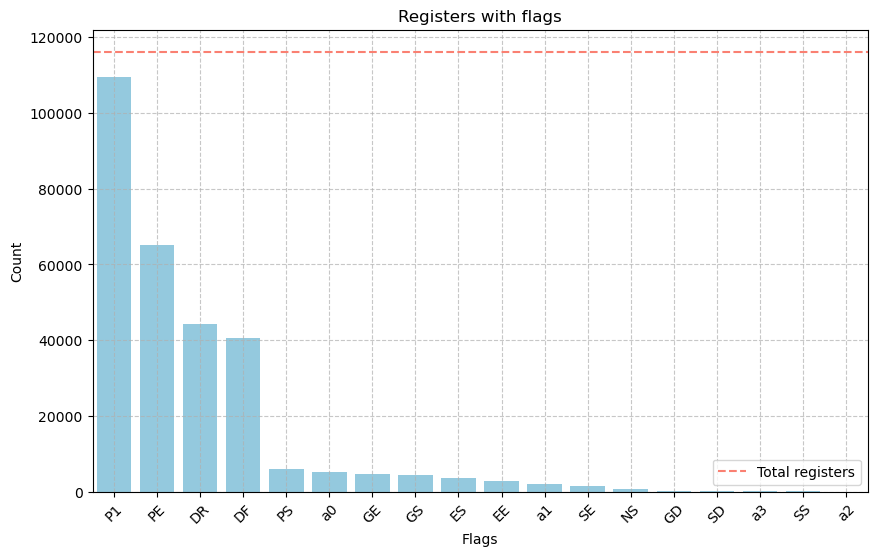

In [14]:
quality_columns = ['DF', 'DR', 'EE', 'ES', 'GD', 'GE', 'GS', 'NS', 'P1',
                   'PE', 'PS', 'SD', 'SE', 'SS', 'a0', 'a1', 'a2', 'a3']

plt.figure(figsize=(10, 6))
count_df = df[quality_columns]
quality_count_df = count_df.sum().sort_values(ascending=False)
sns.barplot(x=quality_count_df.index, y=quality_count_df, color='skyblue')
plt.axhline(y=116143, color='Salmon', linestyle='--', label='Total registers')
plt.title('Registers with flags')
plt.xlabel('Flags')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

- Según el diccionario de datos, P1 indica una posición válida de los sensores. No hay datos disponibles para P0, que representaría una posición inválida, pero es posible que aquellos no marcados con P1 carezcan de una posición válida. La mayoría de los datos tienen una posición válida.
- Se registraron muchos datos como PE, lo que indica la presencia de partículas al momento de la medición. Esto sugiere que en estos casos, el Sol no solo emitió radiación, sino también materia.
- En algunos registros, se observa que los valores de DR y DF son verdaderos. Esto podría significar que en algún momento durante la medición, una parte del instrumento sufrió decimación, lo que resultaría en una menor calidad del registro.
- Además de PE, algunos pocos datos presentan otras categorías, como PS, que señala un posible destello solar (aunque no confirmado), y GE, GD y GS, indicando una brecha en la transmisión de datos. También están ES y EE, que indican que el instrumento perdió de vista al Sol debido a que la Tierra lo tapaba, entre otros. Para nuestro modelo, sería prudente no utilizar estos datos, ya que hay pruebas físicas que indican que no tienen la calidad suficiente.

Ahora analizaremos las columnas `Energy`, `A` y `Q`

In [15]:
df.describe(include='object')

,Energy,A,Q
count,116142,116142,116142
unique,9,3,7
top,6-12,A0,Q1
freq,86958,107772,42347


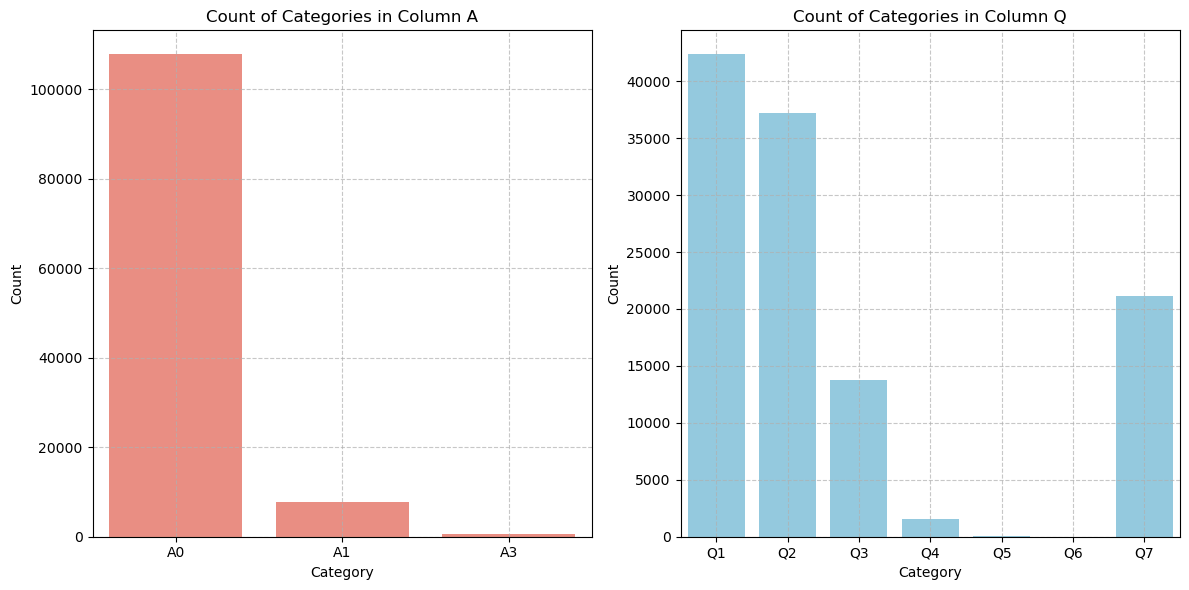

In [16]:
order_A = ['A0', 'A1', 'A3']
order_Q = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', "Q6", "Q7"]

# Plotting with seaborn
plt.figure(figsize=(12, 6))

# Plot for column "A"
plt.subplot(1, 2, 1)
sns.countplot(x=df['A'], order=order_A, color='salmon')
plt.title('Count of Categories in Column A')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot for column "Q"
plt.subplot(1, 2, 2)
sns.countplot(x=df['Q'], order=order_Q, color='skyblue')
plt.title('Count of Categories in Column Q')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- La columna A denota el estado del atenuador en el pico del destello. Se nota que en la mayoría de los casos su estado es normal (A0) pero en algunos está en un estado grueso (A1) y en otros esta en estado grueso y delgado (A3).
- La columna Q denota la calidad general del registro. En este caso Q1 es la calidad más alta y Q11 la calidad más baja. Vemos que ningún dato pasa de calidad Q5 por lo que los datos tendrían buena calidad en este caso. Es posible que la NASA haya eliminado automáticamente los datos con calidad menor a `Q6`, lo que explicaría la ausencia de datos de baja calidad.

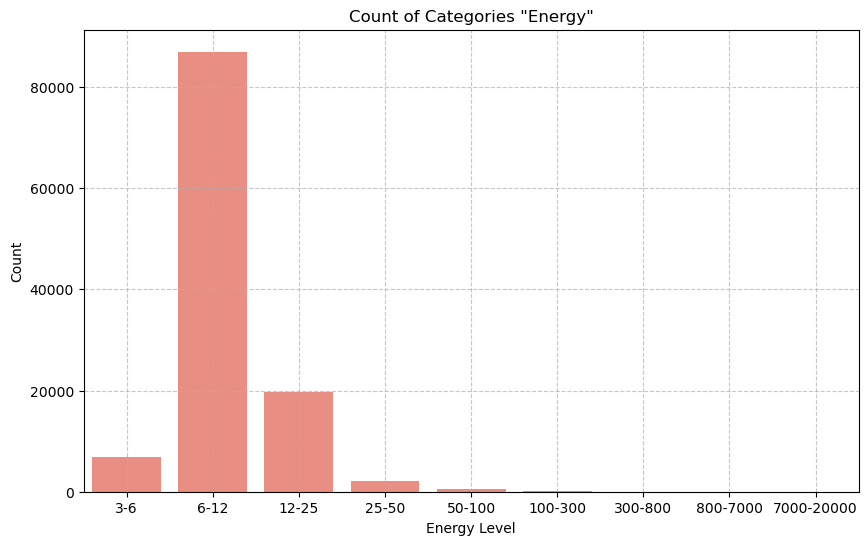

In [17]:
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300", "300-800", "800-7000", "7000-20000"]
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Energy'], color='salmon', order = order)
plt.title('Count of Categories "Energy"')
plt.xlabel('Energy Level')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.7)

Vemos que la mayoría de datos están en un rango de 6-12 KeV, con muy pocos datos en las otras categorías. Esto concuerda con lo que se detecta. Es muy extraño que haya muchas llamaradas solares de alta energía y también es difícil de detectar llamaradas de baja energía con los instrumentos modernos.

<Figure size 640x480 with 0 Axes>

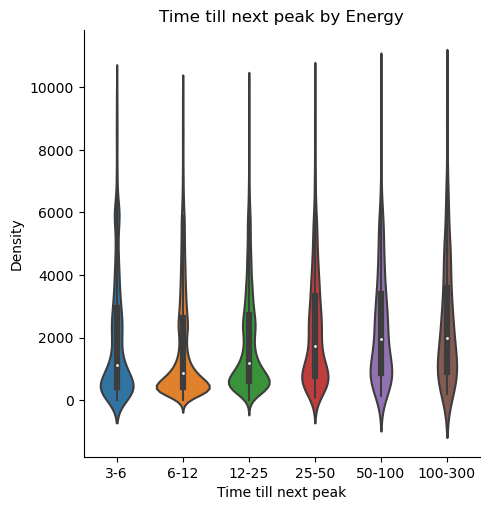

<Figure size 640x480 with 0 Axes>

In [18]:
# The following categories have a very small number of samples, so we won't see their distribution
df_limited_energy = df[(df["Energy"] != "7000-20000") & (df["Energy"] != "800-7000") & (df["Energy"] != "300-800") & (df["Time till next peak"]< 10000)]

# Due to a bug in matplotlib
import warnings
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Figure
order = ["3-6", "6-12", "12-25", "25-50", "50-100", "100-300"]

plt.figure(layout='constrained')
sns.catplot(data=df_limited_energy, x="Energy", y="Time till next peak", kind="violin", order = order)
plt.title('Time till next peak by Energy')
plt.xlabel('Time till next peak')
plt.ylabel('Density')
plt.show()
plt.tight_layout()

Al graficar las distribuciones de `Time till next peak` para cada nivel de `Energy`, se observan patrones diversos. Estas distribuciones exhiben diferentes valores medios y variabilidades. Mientras algunas muestran una forma de campana, especialmente las de niveles de energía más altos, otras presentan una marcada asimetría. Lo más importante a notar es que para energías bajas los datos están concentrados en un rango muy específico de valores.

### Análisis datos numéricos

Procederemos a analizar los datos numéricos. `Flare`, siendo un ID no lo incluiremos en nuestro análisis. `Duration` también lo excluiremos.

In [19]:
df.describe(include = ["int", "float"])[["Peak counts", "Total counts", "X pos", "Y pos", "Radial", "Active region"]]

,Peak counts,Total counts,X pos,Y pos,Radial,Active region
count,116142.00,116142.00,116142.00,116142.00,116142.00,116142.00
mean,215.09,376887.37,-7.69,-42.19,687.89,990.06
std,839.39,3048810.00,755.77,401.91,511.37,1351.85
min,0.00,8.00,-10012.00,-10005.00,0.00,0.00
25%,28.00,22840.00,-701.00,-247.00,467.00,0.00
50%,56.00,58560.00,0.00,-71.00,759.00,691.00
75%,144.00,179808.00,708.00,198.00,946.00,1564.00
max,113156.00,435550080.00,1190.00,1223.00,14154.00,9999.00


Vemos que no hay datos faltantes en la categoría de numéricos. La cantidad total de picos de radiación o `Peak counts` que recibe cada instrumento por segundo va desde 0 hasta 113,156, por lo que hay mucha variabilidad. En `Total counts` la situación es parecida. Veamos la distribución de estos datos.

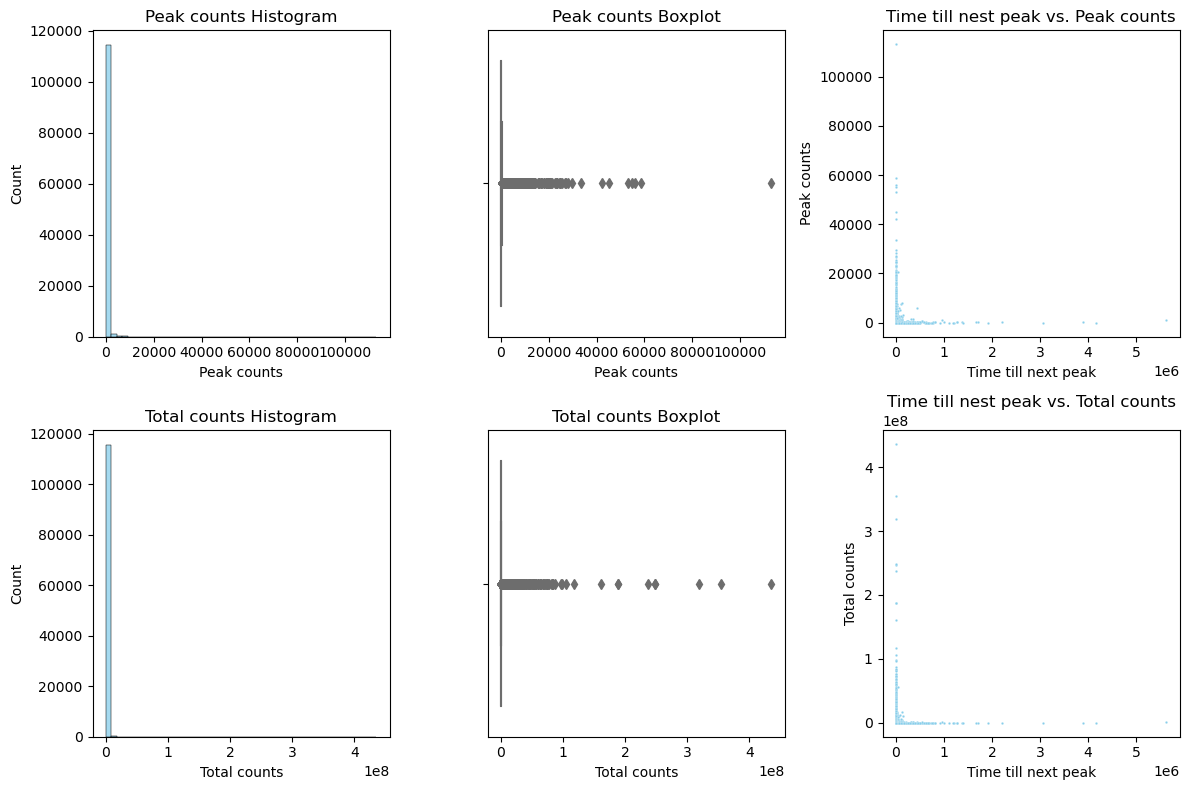

In [20]:
columns = ['Peak counts', 'Total counts']
plot_numerical(df, columns, True)

Vemos que para `Peak counts` y  `Total counts` hay outliers absurdamente grandes, tanto que afectan de sobremanera la distribución de los datos en estas columnas. Si viésemos su distribución limitando sus valores, podríamos verla mejor.

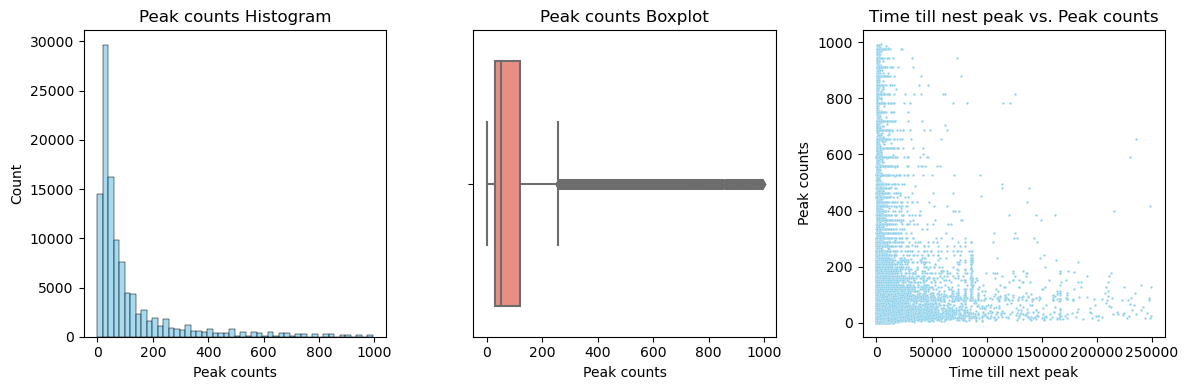

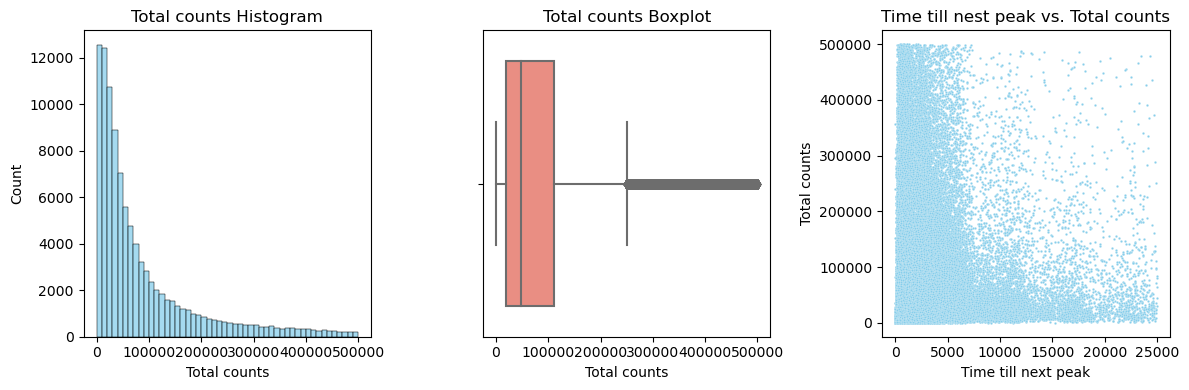

In [21]:
lim_peak_counts = df[(df["Peak counts"]<= 1000) & (df["Time till next peak"] <= 250000)]
lim_total_counts = df[(df["Total counts"]<= 500000) & (df["Time till next peak"] <= 25000)]
plot_numerical(lim_peak_counts, ["Peak counts"], True)
plot_numerical(lim_total_counts, ["Total counts"], True)

Ahora si podemos observar a profundidad las distribuciones de estas columnas. Nótese que no son distribuciones normales. En las dos, hay una candidad alta de valores comunes, para `Peak counts` la mayoría de registros están alrededor de 50 y para `Total counts` están en 50000. Sin embargo para las dos columnas hay muchos datos muy grandes, que clasificarían como outliers. Véase también que entre más `Peak counts` o `Total counts` menor es el `Time till next` en la mayoría de los casos. Son inversamente proporcionales. 

Sabemos por el tamaño del sol en el cielo de que `Radial` no puede ser mayor a 1865 arcosegundos.

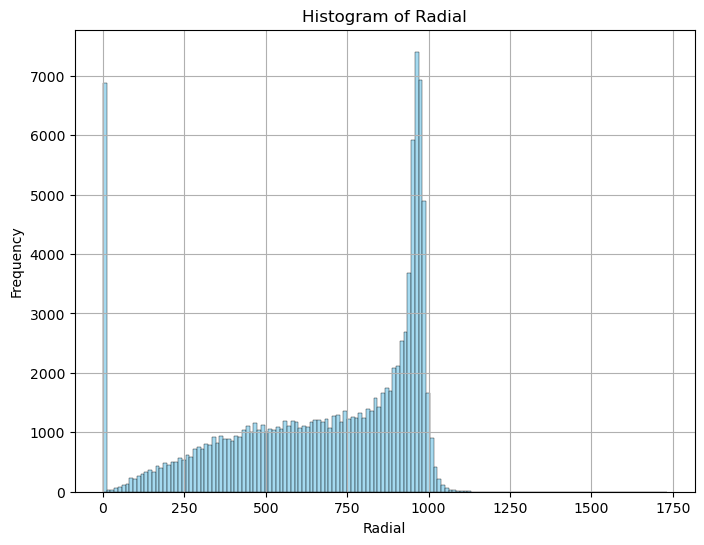

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df[df["Radial"]< 1865], x='Radial', color='skyblue', edgecolor='black', bins = 150)
plt.title('Histogram of Radial')
plt.xlabel('Radial')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Vemos una concentración notable de datos alrededor de los 1000 arcosegundos, con una escasez de observaciones más allá de este punto. Esto sugiere que los instrumentos de medición podrían haber estado enfocados en una región específica, posiblemente el centro del Sol donde se encuentran las manchas solares. De hecho, al graficar únicamente los puntos con un radio menor a 1000 arcosegundos, observamos un patrón que se asemeja a una forma circular (Ver siguiente).

Es importante destacar que hay un gran número de observaciones para las cuales no se dispone de información sobre el radio (`Radial` = 0).

<Figure size 1000x600 with 0 Axes>

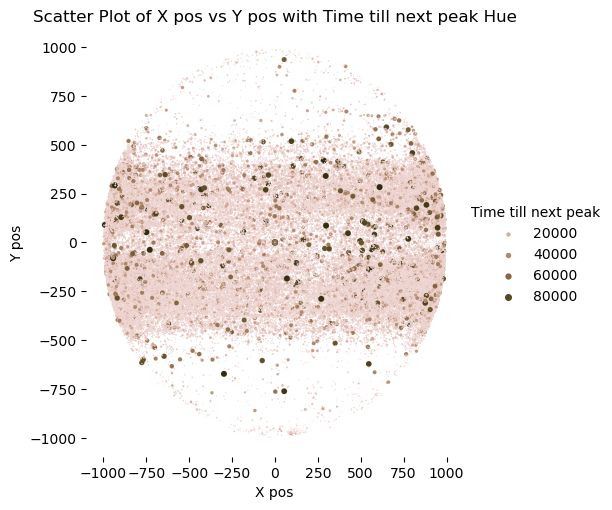

In [23]:
sun_size = df[(abs(df["Radial"]) <= 1000) & (abs(df["Time till next peak"]) <= 100000)].copy()

plt.figure(figsize=(10, 6))
cmap = sns.cubehelix_palette(start=1.5, rot=-.2, as_cmap=True)
g = sns.relplot(data=sun_size, x="X pos", y="Y pos", hue="Time till next peak", size="Time till next peak", palette=cmap, sizes=(0.5, 20),)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

plt.title('Scatter Plot of X pos vs Y pos with Time till next peak Hue')
plt.xlabel('X pos')
plt.ylabel('Y pos')
plt.show()

Podemos ver aquí las regiones de más actividad solar en el área donde se toman mediciones. Vemos que las llamaradas se concentran en dos franjas del centro, con mayor actividad en los extremos. La llamaradas de alta duración están distribuidas por toda la superficie.

Las regiones activas o `Active Region` representan áreas de intensa magnetización, siendo el origen de gran parte de las llamaradas solares y las eyecciones coronales de masa. En ellas se encuentran una o más manchas solares identificadas. Como especificado en el dataset, este es un ID de la posición donde se detecta la llamarada solar. Cada vez que se encuentra una nueva región activa se le añade uno al ID. Hay una gran cantidad de datos con `Active Region` = 0, lo que indica ausencia de información.

### Dimensiones de Calidad de Datos
#### Completitud
La primera vez que examinamos los datos, notamos la presencia de numerosos valores faltantes en las columnas de `Flag n`. No obstante, al profundizar, determinamos que esta ausencia era más bien una rareza de conformidad que de datos faltantes. Por otro lado las columnas `Active Region` y `Radial` tienen muchos datos en 0, un indicador de que faltan datos. Consideramos que dejar estos valores así es pertinente, ya que como estas columnas representan un espacio, marcarlos en el origen de los datos es lo justo (nótese de que este valor también es o se acerca mucho a la mediana de los datos con los que se relacionan, `X pos` y `Y pos`). En el caso de `Active Region`, como representa un ID del lugar, no hay forma de reemplazar los valores, ya que un `Active  region` en 0 podría representar que ese lugar particular no ha sido declarado como mancha solar y por lo tanto no tiene investigación.

#### Conformidad
Ya mencionamos que las columnas de `Flag n` tenían un error de conformidad. Los datos estaban guardados como si fueran una lista a través de varias columnas. La úlima columna incluso tenía varias flags separadas por espacios, como si no les hubiera alcanzado el espacio.  Estas ya se trataron, y se almacenaron como columnas binarias o categóricas. También arreglamos un error de consistencia en las fechas, para que las veces en que una llamarada iniciara en un día y finalizara en otro fueran correctamente marcadas.

In [24]:
# Ver que todas las columans de Flags son binarias, excepto por A y Q que tienen más categorías.
df.iloc[0:5, 16:38]

,Solar cycle,DF,DR,EE,ES,GD,GE,GS,NS,P1,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
0,6,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,A1,Q7
1,6,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,A1,Q1
2,6,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,A1,Q7
3,6,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,A1,Q7
4,6,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,A1,Q2


In [25]:
# Ver que los días que una llamarada empieza muy tarde, esta termina al otro día.
df[(df["Start time"].dt.hour == 23) & (df["Start time"].dt.minute > 55)].iloc[0:5, 1:5]

,Date,Start time,Peak time,End time
73,2002-02-18,2002-02-18 23:59:48,2002-02-19 00:03:22,2002-02-19 00:09:56
118,2002-02-21,2002-02-21 23:56:36,2002-02-22 00:06:42,2002-02-22 00:57:16
205,2002-02-27,2002-02-27 23:57:04,2002-02-28 00:06:46,2002-02-28 00:07:16
298,2002-03-05,2002-03-05 23:57:28,2002-03-06 00:00:14,2002-03-06 00:02:04
905,2002-04-11,2002-04-11 23:57:36,2002-04-11 23:59:02,2002-04-12 00:06:48


Otros aspectos interesantes en relación con la dimensión de conformidad incluyen las unidades en las que se guardan algunas columnas, como los arcosegundos (una unidad común en astronomía pero no en análisis de datos). También nos llamó la atención que la energía se haya almacenado en rangos en lugar de como un dato continuo. Por último, notamos que la descripción de la columna `Active region` no es completamente clara. Consideramos que su explicación es insuficiente y no pudimos encontrar información más detallada sobre su significado.

#### Consistencia
Hay varios datos que deben ser consistentes. Por ejemplo la diferencia entre `Start time` y `End time` debe ser igual a `Duration`. Véase que lo son.

In [26]:
# Es cierto (True) que todas las duraciones son iguales que sus diferencias entre la hora inicial y final.
difference_start_end = (df['End time'] - df['Start time']).dt.total_seconds()
are_they_equal = df['Duration'] == difference_start_end
are_they_equal.unique()

array([ True])

Veamos si la fecha de la llamarada es consistente con su número de ID de la forma (y)ymmddnn.

In [27]:
def check_substring(flare, date_format):
    return date_format in flare

date_to_id_format = (df["Date"].dt.strftime("%y") + df["Date"].dt.strftime("%m").str.zfill(2) + df["Date"].dt.strftime("%d").str.zfill(2))
date_to_id_format = date_to_id_format.apply(lambda x: x[1:] if x[0] == '0' else x) # Remove leading zeroes
flare_str = df["Flare"].astype(str) # Convert to string
comparison_result = flare_str.combine(date_to_id_format, check_substring)
df[comparison_result == False].columns

Index(['Flare', 'Date', 'Start time', 'Peak time', 'End time', 'Duration',
       'Peak counts', 'Total counts', 'Energy', 'X pos', 'Y pos', 'Radial',
       'Active region', 'Time till next peak', 'Year', 'Month', 'Solar cycle',
       'DF', 'DR', 'EE', 'ES', 'GD', 'GE', 'GS', 'NS', 'P1', 'PE', 'PS', 'SD',
       'SE', 'SS', 'a0', 'a1', 'a2', 'a3', 'A', 'Q'],
      dtype='object')

Vemos que existen fechas que no son consistentes con sus números de ID. Esto sucede comúnmente cuando la llamarada empieza a altas horas de la noche (después de las 23 horas) o a altas horas de la madrugada (antes de la una). Por lo tanto, utilizaremos mejor la fecha almacenada en la columna `Date`. Vemos que otro detalle de consistencia es que, cuando `X pos` y `Y pos` son cero,  `Radial` debería ser cero, y viceversa. Esto se cumple.

In [28]:
df[(df["X pos"]==0)&(df["Y pos"]==0)]["Radial"].unique()

array([0], dtype=int64)

In [29]:
df[df["Radial"]==0][["X pos", "Y pos"]].describe().iloc[[3, 7],:]

,X pos,Y pos
min,0.00,0.00
max,0.00,0.00


Concluimos que los datos son consistentes, exepto por el `Flare` ID, sin embargo esto no representa un problema para nuestro proyecto.
##### Unicidad
Nuestros datos tienen un ID. Vemos que tres de ellos se repiten. Sin embargo, véase también que los registros son completamente diferentes. Concluimos que probablemente sea un error tipográfico. Nos quedaremos con ellos. Hemos notado que `Flare` no es la columna más confiable. 

In [30]:
df[df["Flare"].duplicated(keep = False)]

,Flare,Date,Start time,Peak time,End time,Duration,Peak counts,Total counts,Energy,X pos,...,PS,SD,SE,SS,a0,a1,a2,a3,A,Q
14159,3042103,2003-04-21,2003-04-21 10:59:08,2003-04-21 11:01:06,2003-04-21 11:08:48,580,368,239808.00,12-25,-676,...,False,False,False,False,False,False,False,False,A0,Q3
14164,3042103,2003-04-21,2003-04-21 13:28:28,2003-04-21 13:29:26,2003-04-21 14:03:04,2076,2032,5185289.00,6-12,-24,...,False,False,False,False,False,False,False,False,A0,Q3
86839,13111351,2013-11-13,2013-11-13 11:50:40,2013-11-13 11:57:10,2013-11-13 12:04:04,804,2672,4278864.00,100-300,-670,...,False,False,False,False,False,False,False,False,A0,Q3
86843,13111352,2013-11-13,2013-11-13 12:34:40,2013-11-13 12:36:10,2013-11-13 12:40:28,348,120,148080.00,6-12,885,...,False,False,False,False,False,False,False,False,A0,Q2
86845,13111351,2013-11-13,2013-11-13 13:23:04,2013-11-13 13:23:42,2013-11-13 13:27:12,248,152,140496.00,6-12,-669,...,False,False,False,False,False,False,False,False,A0,Q3
86846,13111352,2013-11-13,2013-11-13 13:27:12,2013-11-13 13:29:34,2013-11-13 13:34:28,436,320,380976.00,12-25,-643,...,False,False,False,False,False,False,False,False,A0,Q2


#### Precisión
Con base en nuestra experiencia con los datos, hemos llegado a la conclusión de que la información es confiable y precisa. Aunque nuestra comprensión de la astronomía es limitada, hemos podido confirmar varios patrones del mundo real, como las manchas solares y el ciclo solar. Además, la entidad responsable de la publicación, la NASA, goza de una sólida reputación en el campo de la astronomía. No hemos detectado errores significativos en esta base de datos pública. Por lo tanto, concluimos que la información es lo suficientemente precisa para nuestros propósitos.

##### Integridad
Dado que solo contamos con una única base de datos, no existen relaciones con otras bases de datos. Por lo tanto, podemos confirmar la dimensión de integridad.

### Tratamiento de los datos 
#### ¿Qué datos utilizaremos?
Primero quitaremos algunos datos con marcadores de mala calidad, descrito en la categoría de Flags.
Quitaremos los datos en los que
- La mediciones fueron decimadas (dañadas) en la mayor parte. (DF y DR)
- Los eventos no solares (NS)
- Brecha de datos en las mediciones (GD, GE, y GS)
- Lo que se ha calificado como un posible destello solar; en detectores frontales, pero sin posición. (PS)
- Hubo un eclipse en algún momento de la medición (EE y ES)
- En algún momento de la medición, la nave espacial estaba en SAA. (SS, SD, y SE)

In [114]:
df.loc[:, "Flare number"] = df["Flare"].apply(lambda x: int(str(x)[-2:])) # Ver punto siguiente
df["Time till peak"] = (df['Peak time'] - df['Start time']).dt.total_seconds()
data = df[~(df["DF"] & df["DR"]) & ~df["NS"] & ~(df["GD"] & df["GE"] & df["GS"]) & ~df["PS"] & ~(df["EE"] & df["ES"]) & ~(df["SS"] & df["SD"] & df["SE"])]
data.reset_index(drop=True, inplace=True)

Ahora escogeremos las columnas que nos importan:
- `Duration`, `Time till peak`
- `Peak counts` y `Total counts`.
- `Energy`, a la que le aplicaremos encoding.
- `X pos`, `Y pos` y `Radial`.
- `PE`, ya que indica si hubo un evento de partículas durante la llamarada solar.


In [115]:
data = data[["Flare number", "Solar cycle", "Peak counts", "Total counts", "Energy", "X pos", "Y pos", "Radial", "PE", "Time till peak","Time till next peak"]]
data.head()

,Flare number,Solar cycle,Peak counts,Total counts,Energy,X pos,Y pos,Radial,PE,Time till peak,Time till next peak
0,13,6,136,167304.00,12-25,592,-358,692,False,222.00,688.00
1,28,6,7,9504.00,6-12,604,-341,694,True,58.00,11388.00
2,32,6,15,11448.00,6-12,-310,375,487,False,90.00,12536.00
3,8,6,20,17400.00,12-25,-277,378,469,False,58.00,9684.00
4,10,6,336,313392.00,25-50,-272,390,476,True,82.00,240.00


Ahora procederemos con el encoding de Energy.

In [116]:
from sklearn.preprocessing import OrdinalEncoder
column = data[["Energy"]]
order = ["3-6", "6-12","12-25", "25-50", "50-100", "100-300", "300-800", "800-7000", "7000-20000"]
enc = OrdinalEncoder(categories=[order])
label_encoding = enc.fit_transform(column)
data["Energy"] = pd.DataFrame(label_encoding)
data.tail()

,Flare number,Solar cycle,Peak counts,Total counts,Energy,X pos,Y pos,Radial,PE,Time till peak,Time till next peak
93047,2,11,28,9088.00,1.00,0,0,0,True,86.00,3360.00
93048,3,11,18,2888.00,1.00,-345,-38,347,True,86.00,5672.00
93049,4,11,16,1656.00,1.00,-268,-38,271,True,90.00,67760.00
93050,1,11,15,2224.00,1.00,-115,-38,121,True,130.00,1392272.00
93051,1,11,16,3312.00,1.00,115,192,223,True,82.00,389704.00


#### Outliers
Primero quitaremos los datos posicionales que se marcan fuera del sol.

In [117]:
data = data[data["Radial"]< 1865]

Como nuestros datos no son normales, utilizaremos el método de ML: DBSCAN clustering

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler for the objective column "Time till next peak"
scaler_target = MinMaxScaler()
data_target = data[['Time till next peak']]
data_target_scaled = scaler_target.fit_transform(data_target)
data_target_scaled = pd.DataFrame(data_target_scaled, columns=['Time till next peak'])

# Create a MinMaxScaler for the rest of the DataFrame
scaler_features = MinMaxScaler()
data_features = data.drop(columns=['Time till next peak'])
data_features_scaled = scaler_features.fit_transform(data_features)
data_features_scaled = pd.DataFrame(data_features_scaled, columns=data_features.columns)

# Concatenate the scaled features and the scaled target column
data = pd.concat([data_target_scaled, data_features_scaled], axis=1)

In [119]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

# Function to process the entire data without chunking
def process_complete_data(data, eps, min_samples):
    print(f"Processing complete data with shape: {data.shape}")

    # Create and fit DBSCAN model
    model = DBSCAN(eps=eps, min_samples=min_samples)
    model.fit(data)
    
    # Identify outliers
    outliers_index = model.labels_ == -1
    data_no_outliers = data[~outliers_index]
    
    return data_no_outliers

# Parameters for DBSCAN
eps = 0.08
min_samples = 5

# Process the complete data to remove outliers
data_no_outliers = process_complete_data(data, eps, min_samples)

# Convert back to DataFrame if necessary
df_no_outliers = pd.DataFrame(data_no_outliers, columns=['Flare number', 'Solar cycle', 'Peak counts', 'Total counts', 'Energy',
       'X pos', 'Y pos', 'Radial', 'PE', 'Time till peak',
       'Time till next peak'])

# Reset index
df_no_outliers.reset_index(drop=True, inplace=True)

# If you need to convert it back to NumPy array
data_no_outliers = df_no_outliers.to_numpy()

# Print the resulting data without outliers
print(f"Shape of data after removing outliers: {data_no_outliers.shape}")
print(f"Total number of outliers removed: {data.shape[0] - data_no_outliers.shape[0]}")
data = pd.DataFrame(data_no_outliers, columns = data.columns)


Processing complete data with shape: (92927, 11)
Shape of data after removing outliers: (82279, 11)
Total number of outliers removed: 10648


Veamos la distribución de nuestros nuevos datos y comprobemos visualmente que no hay ningún outlier aparente.

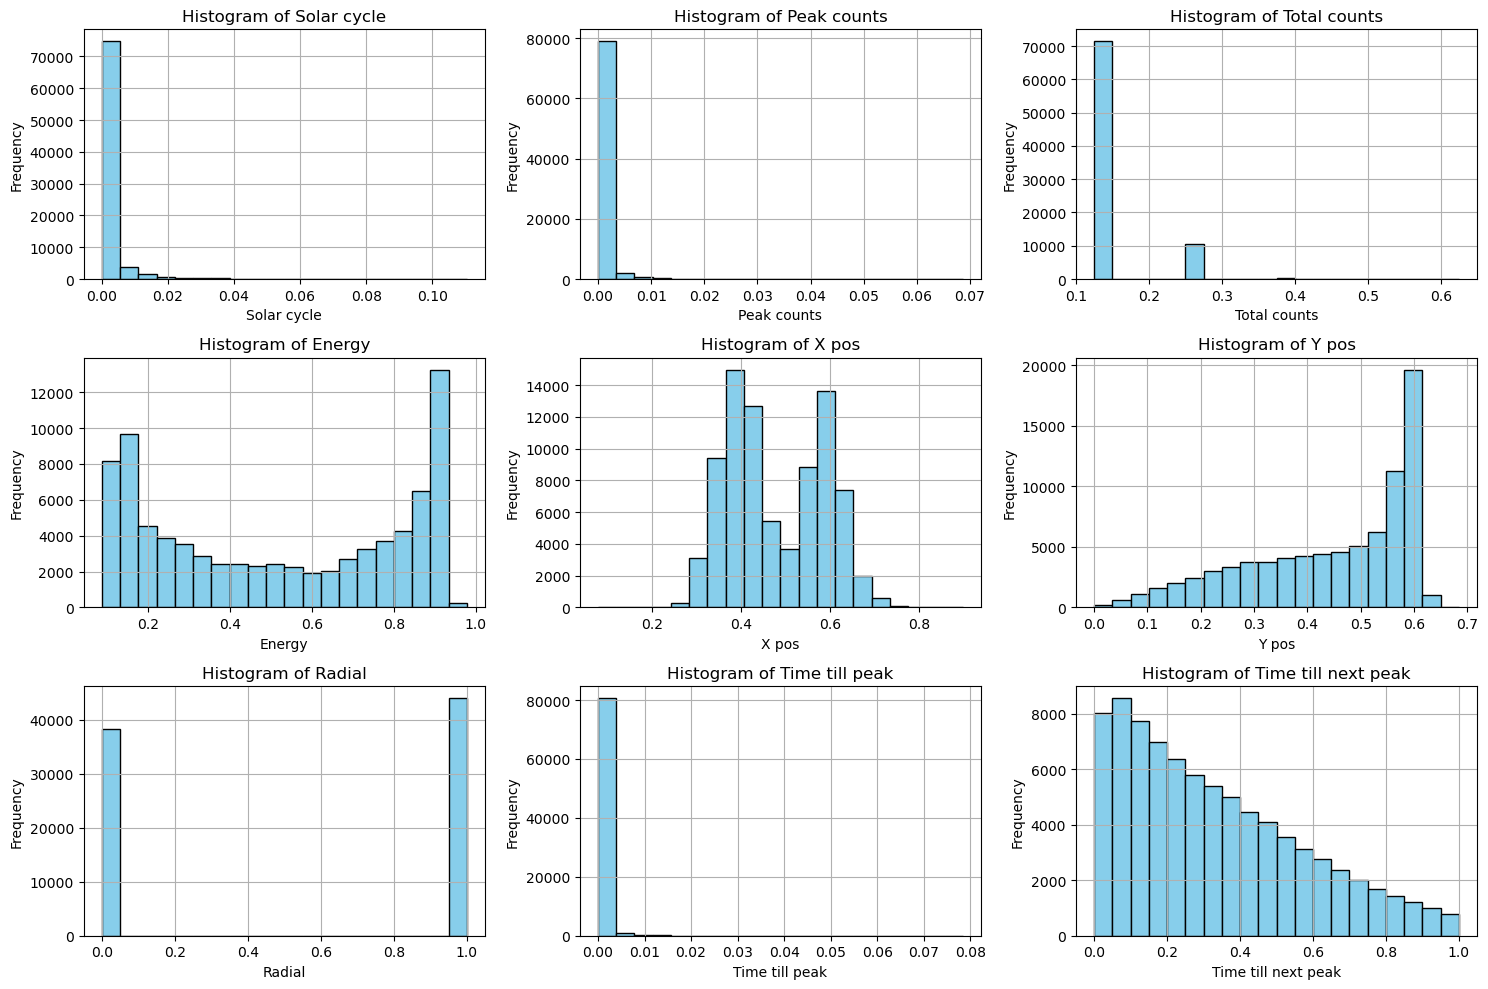

In [85]:
columns = ["Solar cycle", "Peak counts", "Total counts", "Energy", "X pos", "Y pos", "Radial", "Time till peak","Time till next peak"]

num_cols = 3
num_rows = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f"Histogram of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.grid(True)

for i in range(len(columns), num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


Vemos que en compraración a las gráficas de análisis de cada variable, ya las distribuciones se ven mejor. Ya se han quitado los outilers por los que necesitabamos filtrar la basde de datos cada vez que queríamos una gráfica informativa.

#### Importancia de variables
Veamos cuales variables tienen más relación con `Time till next peak`.

<Axes: >

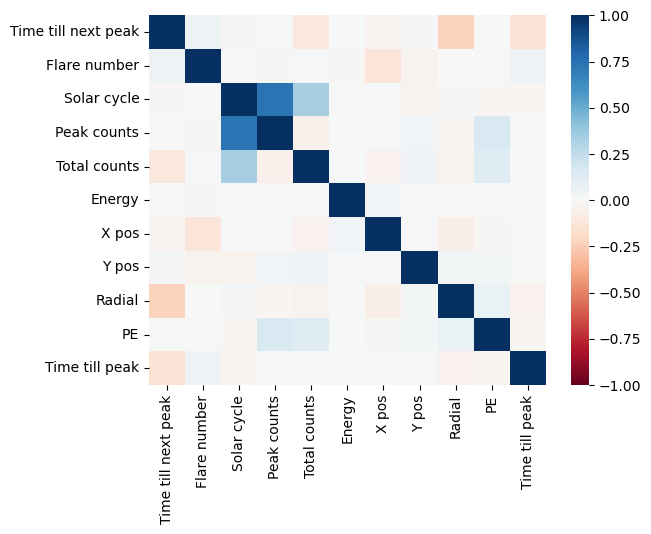

In [86]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

corr = data.corr()

# Calculate partial correlations
feature_num = data.shape[1]
feature_name = data.columns
partial_corr_matrix = np.zeros((feature_num, feature_num))
for i in range(feature_num):
    x1 = data.iloc[:, i]
    for j in range(feature_num):
        if i == j:
            partial_corr_matrix[i, j] = 1
        elif j < i:
            partial_corr_matrix[i, j] = partial_corr_matrix[j, i]
        else:
            x2 = data.iloc[:, j]
            df_control = data.drop(columns=[feature_name[i], feature_name[j]], axis=1)
            L = LinearRegression().fit(df_control, x1)
            Lx = L.predict(df_control)
            x1_prime = x1 - Lx
            
            L = LinearRegression().fit(df_control, x2)
            Lx = L.predict(df_control)
            x2_prime = x2 - Lx
            partial_corr_matrix[i, j] = pearsonr(x1_prime, x2_prime)[0]

# Create a DataFrame from the partial correlation matrix
corrp = pd.DataFrame(partial_corr_matrix, columns=corr.columns)

# Plot the heatmap with a different color palette
sns.heatmap(corrp, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu',  # Choose a different color palette, for example 'viridis'
            vmin=-1, vmax=1)  # Set the range from -1 to 1 for the color scale


Vemos que no hay ninguna variable que tenga una relación lineal monótona muy fuerte con `Time till next peak`. De pronto `Flare number` un poco, pero eso es todo.

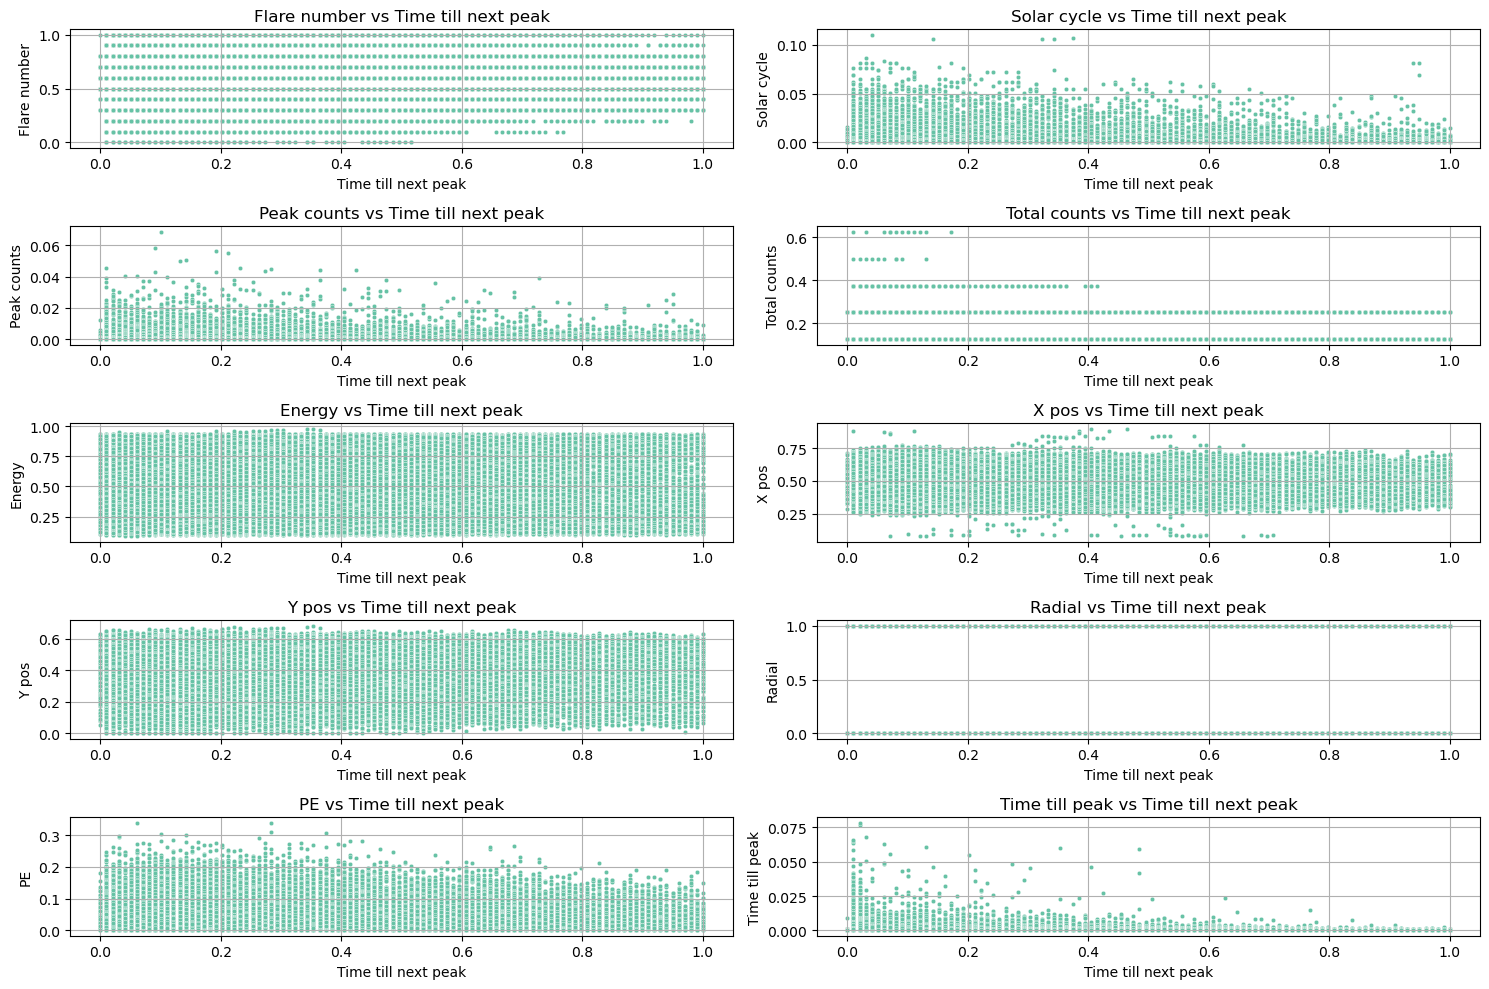

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a new color palette
sns.set_palette("Set2")

# List of columns to plot
columns_to_plot = data.columns.tolist()

# Remove "Duration" from the list if it exists
if "Time till next peak" in columns_to_plot:
    columns_to_plot.remove("Time till next peak")

# Calculate the number of rows and columns for the grid layout
num_cols = 2
num_rows = (len(columns_to_plot) - 1) // num_cols + 1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each variable against "Duration"
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.scatterplot(data=data, x="Time till next peak", y=column, ax=ax,s= 10)
    ax.set_title(f"{column} vs Time till next peak")
    ax.set_xlabel("Time till next peak")
    ax.set_ylabel(column)
    ax.grid(True)
    
# Hide empty subplots
for i in range(len(columns_to_plot), num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()


Observamos que, aunque no existe una relación lineal clara, las diferentes columnas de datos siguen teniendo un gran impacto en la solución.

- `Solar cycle` muestra una relación con `Time till next peak`. Cuando nos encontramos en la mitad del ciclo solar, el tiempo hasta el próximo pico tiende a ser mayor. Esto sugiere una cierta periodicidad en la actividad solar a lo largo del ciclo.

- `Peak counts`, `Total counts`, `Duration` y `Time till peak` exhiben una relación inversamente proporcional. Cuanto mayor es la medida de estas variables (indicativas de una mayor radiación detectada), menor es el tiempo hasta el próximo pico. Esto podría deberse a que una mayor radiación sugiere una mayor actividad solar, lo que resulta en más erupciones solares en un período de tiempo más corto.

- `X pos` también muestra una relación significativa: a mayor distancia del origen, mayores son los tiempos entre picos sucesivos. Por otro lado, `Y pos` presenta una relación inversa, donde tiempos mayores se observan al acercarse al origen, aunque esto varía si se está muy cerca del origen.

- `Radial` indica que cuanto más cerca se está del borde del sol, mayor es el tiempo entre picos sucesivos. Esto puede ser debido a la dinámica de la actividad solar, donde regiones más cercanas al borde pueden experimentar diferencias en la actividad.

Nótese igualmente que ninguna de estas relaciones es suficientemente fuerte para que la línea de regresión no sea horizontal.


#### División de los datos en entrenamiento, validación y prueba

In [120]:
from sklearn.model_selection import train_test_split
var_salida = "Time till next peak"
data_x = data.drop(columns=[var_salida])
data_y = data[var_salida]
semilla = 42

# Proporcion de datos en train, validation y test
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Realizar la division en dos pasos (primero train y val/test, y luego val/test en validation y test)
x_train, x_val_test, y_train, y_val_test = train_test_split(data_x, data_y, test_size= validation_ratio + test_ratio, random_state = semilla)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state = semilla)

In [121]:
print("X train shape", x_train.shape)
print("y train shape", y_train.shape)
print("X val shape", x_val.shape)
print("y val shape", y_val.shape)
print("X test shape", x_test.shape)
print("y test shape", y_test.shape)

X train shape (49367, 10)
y train shape (49367,)
X val shape (16456, 10)
y val shape (16456,)
X test shape (16456, 10)
y test shape (16456,)


### Modelación
#### Random Forest

In [122]:
y_test_a = scaler_target.inverse_transform(pd.DataFrame(y_test))

In [123]:
def median_squared_error(y_true, y_pred):
    return np.median((y_true - y_pred) ** 2)

def median_absolute_error(y_true, y_pred):
    return np.median(np.abs(y_true - y_pred))

def median_absolute_percentage_error(y_true, y_pred): 
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [126]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid_rf = {
    'max_depth': [20, 25, 10, 15, 5],
    'min_samples_split': [2, 5, 10, 15, 20, 30],
    'min_samples_leaf': [6, 4, 2, 1],
}
# Variables to store the best model and best score
best_model_rf = None
best_score_rf = -np.inf
best_params_rf = {}

We found the best model to be that of hyperparameters {"max_depth":50, "min_samples_leaf": 4, "min_samples_split":10}. Plese don't run the next line again, as it will take several hours. Instead train the model with those hyperparameters below.

In [ ]:
count_rf = 0
# Iterate over all combinations of hyperparameters
for max_depth in param_grid_rf['max_depth']:
        for min_samples_split in param_grid_rf['min_samples_split']:
            for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                count_rf += 1
                print("RF model ", count_rf, "training")
                # Create and train the model with the current hyperparameters
                model = RandomForestRegressor(
                    n_estimators=100,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                
                model.fit(x_train, y_train)
                
                # Make predictions on the validation data
                y_pred = model.predict(x_test)
                
                # Calculate the R-squared score
                score = r2_score(y_test, y_pred)
                
                # Update the best model if the current one is better
                if score > best_score_rf:
                    best_score_rf = score
                    best_model_rf = model
                    best_params_rf = {
                        'n_estimators': 100,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'random_state':42
                    }

RF model  1 training
RF model  2 training
RF model  3 training
RF model  4 training
RF model  5 training
RF model  6 training
RF model  7 training
RF model  8 training
RF model  9 training
RF model  10 training
RF model  11 training
RF model  12 training
RF model  13 training
RF model  14 training
RF model  15 training
RF model  16 training
RF model  17 training
RF model  18 training
RF model  19 training
RF model  20 training
RF model  21 training
RF model  22 training
RF model  23 training
RF model  24 training
RF model  25 training
RF model  26 training
RF model  27 training
RF model  28 training
RF model  29 training
RF model  30 training
RF model  31 training
RF model  32 training


In [ ]:
params_rf = best_params_rf
rf_regressor = RandomForestRegressor(**params_rf)
rf_regressor.fit(x_train, y_train)

In [ ]:
predictions_rf = rf_regressor.predict(x_test)

In [ ]:
predicions_rf_scaled = pd.DataFrame(predictions_rf)
predicions_rf_scaled = scaler_target.inverse_transform(predicions_rf_scaled)

In [110]:
print("Models tried", count_rf)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", best_params_rf)
print("Best R-squared (R2) score on test data:", best_score_rf)

r2_test_rf = r2_score(y_test_a, predicions_rf_scaled)

mse_test_rf = mean_squared_error(y_test_a, predicions_rf_scaled)
mae_test_rf = mean_absolute_error(y_test_a, predicions_rf_scaled)
mape_test_rf = mean_absolute_percentage_error(y_test_a, predicions_rf_scaled)

median_squared_error_test_rf = median_squared_error(y_test_a, predicions_rf_scaled)
median_absolute_error_test_rf = median_absolute_error(y_test_a, predicions_rf_scaled)
meape_test_rf = median_absolute_percentage_error(y_test_a, predicions_rf_scaled)

# Print the evaluation metrics
print()
print("Mean Squared Error (MSE) on test data:", mse_test_rf)
print("Mean Absolute Error (MAE) on test data:", mae_test_rf)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_test_rf)
print()

print("Median Squared Error (MSE) on test data:", median_squared_error_test_rf)
print("Median Absolute Error (MAE) on test data:", median_absolute_error_test_rf)
print("Median Absolute Percentage Error (MAPE) on test data:", meape_test_rf)

Models tried 144
Best hyperparameters: {'max_depth': 50, 'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 42}


NameError: name 'predicions_rf_scaled' is not defined

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#Define the parameter grid

param_grid_gb = {
    'learning_rate': [0.01, 0.1, 0.5, 1, 3],
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Variables to store the best model and best score
best_model_gb = None
best_score_gb = -np.inf
best_params_gb = {}

We found the best model to be that of hyperparameters {"learning_rate": 1, "max_depth": 10}. Plese don't run the next line again, as it will take several hours. Instead train the model with those hyperparameters below.

In [ ]:
count_gb = 0
# Iterate over all combinations of hyperparameters
for max_depth in param_grid_gb['max_depth']:
    for learning_rate in param_grid_gb['learning_rate']:
        for min_samples_split in param_grid_gb['min_samples_split']:
            for min_samples_leaf in param_grid_gb['min_samples_leaf']:
                count_gb += 1
                print("GB model ", count_gb, "training")
                # Create and train the model with the current hyperparameters
                model = GradientBoostingRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    learning_rate = learning_rate,
                    random_state=42,
                    n_estimators=100
                )
                
                model.fit(x_train, y_train)
                
                # Make predictions on the validation data
                y_pred = model.predict(x_test)
                
                # Calculate the R-squared score
                score = r2_score(y_test, y_pred)
                
                # Update the best model if the current one is better
                if score > best_score_gb:
                    best_score_gb = score
                    best_model_gb = model
                    best_params_gb = {
                        'learning_rate': learning_rate,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'random_state':42
                    }

In [ ]:
params_gb = best_params_gb
gb_regressor = GradientBoostingRegressor(**params_gb)
gb_regressor.fit(x_train, y_train)

In [ ]:
predictions_gb = gb_regressor.predict(x_test)

In [ ]:
predicions_gb_scaled = pd.DataFrame(predictions_gb)
predicions_gb_scaled = scaler_target.inverse_transform(predicions_gb_scaled)

In [ ]:
print("Models tried", count_gb)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", best_params_gb)
print("Best R-squared (R2) score on test data:", best_score_gb)

r2_test = r2_score(y_test_a, predicions_gb_scaled)

mse_test = mean_squared_error(y_test_a, predicions_gb_scaled)
mae_test = mean_absolute_error(y_test_a, predicions_gb_scaled)
mape_test = mean_absolute_percentage_error(y_test_a, predicions_gb_scaled)

median_squared_error_test = median_squared_error(y_test_a, predicions_gb_scaled)
median_absolute_error_test = median_absolute_error(y_test_a, predicions_gb_scaled)
meape_test = median_absolute_percentage_error(y_test_a, predicions_gb_scaled)

# Print the evaluation metrics
print()
print("Mean Squared Error (MSE) on test data:", mse_test)
print("Mean Absolute Error (MAE) on test data:", mae_test)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_test)

print()
print("Median Squared Error (MSE) on test data:", median_squared_error_test)
print("Median Absolute Error (MAE) on test data:", median_absolute_error_test)
print("Median Absolute Percentage Error (MAPE) on test data:", meape_test)


#### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {
    'max_depth': [10, 15, 20, 25, 30, 35],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 4, 8, 12]
}

# Variables to store the best model and best score
best_model_dt = None
best_score_dt = -np.inf
best_params_dt = {}

The same applies for this model. The best hyperparameters found where {"max_depth": 35}. This one is fast to run.

In [103]:
count_dt = 0
# Iterate over all combinations of hyperparameters
for max_depth in param_grid_dt['max_depth']:
    for min_samples_split in param_grid_dt['min_samples_split']:
        for min_samples_leaf in param_grid_dt['min_samples_leaf']:
                count_dt += 1
                print("DT model ", count_dt, "training")
                # Create and train the model with the current hyperparameters
                model = DecisionTreeRegressor(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    random_state=42
                )
                
                model.fit(x_train, y_train)
                
                # Make predictions on the validation data
                y_pred = model.predict(x_test)
                
                # Calculate the R-squared score
                score = r2_score(y_test, y_pred)
                
                # Update the best model if the current one is better
                if score > best_score_dt:
                    best_score_dt = score
                    best_model_dt = model
                    best_params_dt = {
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'random_state':42 
                    }

DT model  1 training
DT model  2 training
DT model  3 training
DT model  4 training
DT model  5 training
DT model  6 training
DT model  7 training
DT model  8 training
DT model  9 training
DT model  10 training
DT model  11 training
DT model  12 training
DT model  13 training
DT model  14 training
DT model  15 training
DT model  16 training
DT model  17 training
DT model  18 training
DT model  19 training
DT model  20 training
DT model  21 training
DT model  22 training
DT model  23 training
DT model  24 training
DT model  25 training
DT model  26 training
DT model  27 training
DT model  28 training
DT model  29 training
DT model  30 training
DT model  31 training
DT model  32 training
DT model  33 training
DT model  34 training
DT model  35 training
DT model  36 training
DT model  37 training
DT model  38 training
DT model  39 training
DT model  40 training
DT model  41 training
DT model  42 training
DT model  43 training
DT model  44 training
DT model  45 training
DT model  46 traini

In [104]:
params_dt= best_params_dt
dt_regressor = DecisionTreeRegressor(**params_dt)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=12, random_state=42)

In [105]:
predictions_dt = dt_regressor.predict(x_test)

In [106]:
predicions_dt_scaled = pd.DataFrame(predictions_dt)
predicions_dt_scaled = scaler_target.inverse_transform(predicions_dt_scaled)

In [113]:
print("Models tried", count_dt)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", best_params_dt)
print("Best R-squared (R2) score on test data:", best_score_dt)

r2_test_dt = r2_score(y_test_a, predicions_dt_scaled)

mse_test_dt = mean_squared_error(y_test_a, predicions_dt_scaled)
mae_test_dt = mean_absolute_error(y_test_a, predicions_dt_scaled)
mape_test_dt = mean_absolute_percentage_error(y_test_a, predicions_dt_scaled)

median_squared_error_test_dt = median_squared_error(y_test_a, predicions_dt_scaled)
median_absolute_error_test_dt = median_absolute_error(y_test_a, predicions_dt_scaled)
meape_test_dt = median_absolute_percentage_error(y_test_a, predicions_dt_scaled)

# Print the evaluation metrics
print("Mean Squared Error (MSE) on test data:", mse_test_dt)
print("Mean Absolute Error (MAE) on test data:", mae_test_dt)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_test_dt)

print()
print("Median Squared Error (MSE) on test data:", median_squared_error_test_dt)
print("Median Absolute Error (MAE) on test data:", median_absolute_error_test_dt)
print("Median Absolute Percentage Error (MAPE) on test data:", meape_test_dt)

Models tried 120
Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 12, 'random_state': 42}
Best R-squared (R2) score on test data: 0.1742262379963656
Mean Squared Error (MSE) on test data: 1567238929719.9055
Mean Absolute Error (MAE) on test data: 1006881.5969432935
Mean Absolute Percentage Error (MAPE) on test data: 47129.843334810525

Median Squared Error (MSE) on test data: 756698785091.7362
Median Absolute Error (MAE) on test data: 869884.3515615948
Median Absolute Percentage Error (MAPE) on test data: 47.34256324215009


# Evaluación

## Rendimiento del modelo y revisar overfitting

In [ ]:
best_model = dt_regressor

In [ ]:
x_train_test = pd.concat([x_train, x_test])
y_train_test = pd.concat([y_train, y_test])
best_model.fit(x_train_test, y_train_test)

In [ ]:
y_val_b = scaler_target.inverse_transform(pd.DataFrame(y_val))

In [ ]:
# Generar las predicciones para el conjunto de validation
y_pred = best_model.predict(x_val)
y_pred = pd.DataFrame(y_pred)
y_pred = scaler_target.inverse_transform(y_pred)

In [ ]:
mse_val = mean_squared_error(y_val_b, y_pred)
mae_val = mean_absolute_error(y_val_b, y_pred)
mape_val = mean_absolute_percentage_error(y_val_b, y_pred)

median_squared_error_val = median_squared_error(y_val_b, y_pred)
median_absolute_error_val = median_absolute_error(y_val_b, y_pred)
meape_val = median_absolute_percentage_error(y_val_b, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE) on test data:", mse_val)
print("Mean Absolute Error (MAE) on test data:", mae_val)
print("Mean Absolute Percentage Error (MAPE) on test data:", mape_val)

print()
print("Median Squared Error (MSE) on test data:", median_squared_error_val)
print("Median Absolute Error (MAE) on test data:", median_absolute_error_val)
print("Median Absolute Percentage Error (MAPE) on test data:", meape_val)

In [ ]:
dif_mse = abs(mse_val - mse_test_dt)/mse_test_dt * 100
print("la diferencia para MSE es: " + str(dif_mse) + "%")
dif_mae = abs(mae_val - mae_test_dt)/mae_test_dt*100
print("la diferencia para MAPE es: " + str(dif_mae) + "%")
dif_mape = abs(mape_val - mape_test_dt)/mape_test_dt*100
print("la diferencia para MAE es: " + str(dif_mape) + "%")
dif_mse_m = abs(median_squared_error_val - median_squared_error_test_dt)/median_squared_error_test_dt*100
print("la diferencia para MSE es: " + str(dif_mse_m) + "%")
dif_mae_m = abs(median_absolute_error_val - median_absolute_error_test_dt)/ median_absolute_error_test_dt * 100
print("la diferencia para MAPE es: " + str(dif_mae_m) + "%")
dif_mape_m = abs(meape_val - meape_test_dt)/meape_test_dt
print("la diferencia para MAPE es: " + str(dif_mape_m) + "%")

 Vemos que para valores de la mediana no hay un overfitting muy severo. Para los valores de la media si hay una diferencia notable, pero porcentualmente es muy poca. Nuestro modelo se ha generalizado bien.

## Gráficas de error y preguntas relacionadas

In [ ]:
# Primero, calcular los errores absolutos
err_abs = abs(y_val_b - y_pred)
err_abs = pd.Series(list(err_abs))
err_abs = err_abs.apply(lambda x: x[0])

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(err_abs[(err_abs >= 0) & (err_abs <= 30000)], bins=50, color='skyblue', edgecolor='black')
plt.title('Histograma de errores absolutos')
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
DF = pd.DataFrame({'Errores Absolutos': err_abs[(err_abs >= 0) & (err_abs <= 30000)]})
ax = DF.plot(kind='box', title='boxplot', showmeans=True, figsize=(9,5))

Vemos que hay muchos datos con poco error, y pocos datos con mucho error. Podemos ver que es un buen modelo, aunque con muchos datos lejos de la media, como si fueran outliers. Es comprensible que las estadísticas entre la media y la mediana sean tan diferentes, teniendo en cuenta estos datos anómalos.

In [ ]:
data_val_a = pd.DataFrame(scaler_features.inverse_transform(x_val), columns = ['Flare number', 'Solar cycle', 'Peak counts',
       'Total counts', 'Energy', 'X pos', 'Y pos', 'Radial', 'PE', "Time till peak"])
data_val = data_val_a.copy()
data_val["Error absoluto"] = err_abs

In [ ]:
var_considerada = "Energy"
data_val_energy = data_val.groupby(var_considerada, as_index=False)['Error absoluto'].median()
data_val_energy_sort = data_val_energy.sort_values(by=var_considerada)
data_val_energy_sort.plot.bar(x = var_considerada)
plt.ylim(1400, 3000)
plt.show()

Podemos ver que el modelo puede predecir con mejor exactitud las llamaradas con energía de 6-12 KeV, dado que estos son a su vez, los valores más comunes dentro del modelo, y el tipo de llamarada más común. Para el resto de valores, y especialmente esos de energías más altas se disponía de pocos datos, por lo que el error es mayor. Nótese que la gráfica comienza su eje veritcal en 1400.

In [ ]:
var_considerada = "Solar cycle"
data_val_energy = data_val.groupby(var_considerada, as_index=False)['Error absoluto'].median()
data_val_energy_sort = data_val_energy.sort_values(by=var_considerada)
data_val_energy_sort.plot.bar(x=var_considerada)
plt.xticks(range(len(data_val_energy_sort[var_considerada])), [1,2,3,4,5,6,7,8,9,10,11])
plt.show()

También, nos encontramos con que el modelo predice de mejor manera las llamaradas a la mitad de su ciclo solar. Esto es debido a que hay un desbalance en el número de llamaradas que hay por ciclo solar, algunos ciclos teniendo muchos datos de entrenamiento y otros moy pocos de los que entrenarse. Por lo tanto el modelo es parcial. Se necesitarán más datos de llamaradas solares en los extremos de los ciclos.

In [ ]:
import matplotlib.pyplot as plt

variables = ["Flare number", "Peak counts", "Total counts", "X pos", "Y pos", "Radial", "Time till peak"]
a = data_val[(data_val["Error absoluto"] >= 0) & (data_val["Error absoluto"] <= 20000)]

num_plots = len(variables)
num_rows = (num_plots + 1) // 2  # Number of rows for subplots, adding 1 to round up

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, var in enumerate(variables, start=1):
    plt.subplot(num_rows, 2, i)  # Create subplot
    plt.scatter(a[var], a['Error absoluto'], s = 1)
    plt.xlabel(var)
    plt.ylabel('Error absoluto')
    plt.title(f'Scatter plot: {var} vs. Error absoluto')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Se visualizan las mismas distribuciones que las variables anteriores. No han nada fuera de lo normal. El error absoluto es siempre mayor para aquellos datos menos comunes en el entrenamiento. Revisemos cuales fueron las caracteristicas más importantes para nuestro modelo final.

In [ ]:
importancias_variables =  pd.DataFrame(best_model.feature_importances_, index = list(x_train_test.columns))
importancias_variables.plot.bar()
plt.show()

## Intervalos de confianza

In [ ]:
#MAE-median
from scipy.stats import t
res_abs = err_abs.values
x = res_abs.copy()
confidence = 0.95  # Confidence level

mean = np.mean(x)
s = np.std(x)

dof = len(x) - 1

t_crit = np.abs(t.ppf((1 - confidence) / 2, dof))

se_mean = s / np.sqrt(len(x))

lower_bound = mean - t_crit * se_mean
upper_bound = mean + t_crit * se_mean

print("Confidence Interval for the MAE:", (lower_bound, upper_bound))

In [ ]:
#MSE-median
res_squared = res_abs**2

x = res_squared.copy()
confidence = 0.95  # Confidence level

mean = np.mean(x)
s = np.std(x)

dof = len(x) - 1

t_crit = np.abs(t.ppf((1 - confidence) / 2, dof))

se_mean = s / np.sqrt(len(x))

lower_bound = mean - t_crit * se_mean
upper_bound = mean + t_crit * se_mean

print("Confidence Interval for the MSE:", (lower_bound, upper_bound))

In [ ]:
#MAPE-median
res_percentage = (res_abs)/y_val_b.flatten()
x = res_percentage.copy()
confidence = 0.95  # Confidence level

mean = np.mean(x)
s = np.std(x)

dof = len(x) - 1

t_crit = np.abs(t.ppf((1 - confidence) / 2, dof))

se_mean = s / np.sqrt(len(x))

lower_bound = mean - t_crit * se_mean
upper_bound = mean + t_crit * se_mean

print("Confidence Interval for the MAPE:", (lower_bound, upper_bound))

## Revisar normalidad

Sabemos que los datos no son normales, pero podríamos hacer una prueba de hipótesis para comprobar

In [ ]:
from scipy.stats import norm, normaltest

res = (y_pred - y_val_b).flatten()

k2, p = normaltest(res)
print(f"Test Statistic: {k2}, p-value: {p}")

filtered_res = res[(res > -20000) & (res < 20000)]

# Plot the histogram
plt.hist(filtered_res, bins=50, density=True, alpha=0.6, color='g')

# Fit a normal distribution to the data
mu, std = norm.fit(filtered_res)

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram of Results with Normal Distribution Fit')

# Show the plot
plt.show()

Como p es menor que 0.05, se rechaza la hipótesis nula de que los residuos siguen una distribución normal, por lo que no se puede asumir que los residuos sigan una distribución normal.

## Comparación con la mediana simple
Vamos a realizar un A/B testing, donde los modelos a considerar serían los de nuestro mejor modelo y los de la mediana simple de la variable de salida del modelo, para evitar complicaciones con los supuesto se hará un Test de wilcoxon para determinar de manera no parámetrica si existe o no una diferencia significativa entre las medianas de las dos poblaciones, de manera más específica queremos ver que nuestro modelo es mejor que la mediana simple teniendo un menor error.

In [ ]:
y_pred_model = y_pred.flatten()
# Calcula la media simple de y_train_val
y_train_test_c = scaler_target.inverse_transform(pd.DataFrame(y_train_test))
media_y_train_test = np.median(y_train_test_c)
print(f"Mediana de y_train: {media_y_train_test}")
pred_media = np.full(len(y_val), media_y_train_test)

In [ ]:
mae_model = median_absolute_error(y_val_b.flatten(), y_pred_model)
mae_media = median_absolute_error(y_val_b.flatten(), pred_media)
print(f"MAE del modelo: {mae_model:14f}")
print(f"MAE de la mediana: {mae_media}")

In [ ]:
from scipy.stats import wilcoxon
Statistic, p_value = wilcoxon(x=y_pred_model, y=pred_media, alternative='less')  #alternative less para probar que x es menor que y

print(f"p-value: {p_value}")

# Determinar el nivel de significancia
alpha = 0.000000000000001  # Por ejemplo, para un nivel de confianza del 95%

# Comprobar si el p-valor es menor que alpha
if p_value < alpha:
    confidence_level = 100 * (1 - alpha)
    print(f"Con un nivel de confianza del {confidence_level}%, podemos rechazar la hipótesis nula.")
else:
    print("No podemos rechazar la hipótesis nula con el nivel de significancia seleccionado.")

Como vemos que el p-valor es un valor muy cercano a 1, no existe suficiente evidencia (más del 99.99%) de que el modelo seleccionado es mejor que la mediana simple en terminos de error absoluto.
Usar Repeated k-folds cross validation para revisar los intervalos de confianza de las métricas

In [ ]:
#Comprobar usando 1 k-fold cross validation
from sklearn.model_selection import cross_val_score
x = scaler_target.inverse_transform(pd.DataFrame(x_val))
y = scaler_target.inverse_transform(pd.DataFrame(y_val))
# Realizar k-fold cross validation con 5 folds
# en X van los datos de entrada y en y los de salida
scores = cross_val_score(best_model, x, y, cv=5, scoring='neg_mean_absolute_error')

# Calcular el promedio de los scores obtenidos
mean_score = -scores.mean()

# Imprimir el resultado
print("Mean absolute Error:", mean_score)

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
# Sem calcula el error estandar de la media de los valores en el array de inputs
from scipy.stats import sem
from numpy import mean, std
from matplotlib import pyplot

# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
# prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=semilla)	
    
    # Realizar k-fold cross validation con CV folds
    # en X van los datos de entrada y en y los de salida
    scores = cross_val_score(best_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    return scores

repeats = range(1,10)
results = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(x, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

In [ ]:
mean_scores = [mean(s) for s in results]
sem_scores = [sem(s) for s in results]

mean_scores = -mean(mean_scores)
sem_scores = mean(sem_scores)

Linf = mean_scores - 1.96*sem_scores
Lsup = mean_scores + 1.96*sem_scores

print(f"Se espera que el error absoluto medio sea {mean_scores} con un intervalo de confianza de 95% de ({Linf}, {Lsup})")

In [ ]:
modelo_guardar = best_model.fit(data_x, data_y)
lista = [mean_scores,Linf,Lsup]

import pickle as pk
pk.dump(modelo_guardar, open("modelo_guardar.pkl", "wb"))  # Guardar el modelo
pk.dump(lista, open("intervalo.pkl", "wb"))  # Guardar el modelo

import joblib
joblib.dump(scaler_target, 'scaler_target.gz')
joblib.dump(scaler_target, 'scaler_features.gz')